In [4]:
import pandas as pd
import numpy as np
from datetime import timedelta

def linear_interpolation(df):
    # Iterate over each column in the DataFrame
    
    column = df['state_of_charge']

    # Iterate over each index in the column
    for i in range(len(column)):
        # If the current value is NaN, perform linear interpolation
        if pd.isna(column[i]):
            # Find the previous and next non-NaN values
            prev_index = i - 1
            next_index = i + 1

            while pd.isna(column[prev_index]):
                prev_index -= 1

            while pd.isna(column[next_index]):
                next_index += 1

            # Perform linear interpolation if both previous and next values exist
            if prev_index >= 0 and next_index < len(column):
                prev_val = column[prev_index]
                next_val = column[next_index]

                # Calculate the time difference between previous and next values
                prev_time = df.index[prev_index]
                next_time = df.index[next_index]
                delta_time = next_time - prev_time

                # Calculate the interpolation step size based on time difference
                step_size = timedelta(minutes=1)

                # Interpolate for each minute within the time interval
                for time in pd.date_range(prev_time + step_size, next_time, freq=step_size):
                    # Calculate the interpolation ratio based on time difference
                    delta_time_step = time - prev_time
                    interpolation_ratio = delta_time_step / delta_time

                    # Perform linear interpolation
                    interpolated_value = prev_val + (next_val - prev_val) * interpolation_ratio

                    # Update the DataFrame with the interpolated value
                    df.at[time, 'state_of_charge'] = interpolated_value
    
    # Sort the DataFrame by index (time)
    df.sort_index(inplace=True)
    
    return df


df = pd.read_csv('ASN00003.csv')
df=df.drop(df.columns[[0,1,2,3,4,7,8,9,10]],axis=1)
df['datetime'] = pd.to_datetime(df['record_create_timestamp'])
df.set_index('datetime', inplace=True)

resampled_df = df.resample('Min').mean()
interpolated_df = linear_interpolation(resampled_df)

print("\nInterpolated DataFrame:")
print(interpolated_df)



Interpolated DataFrame:
                     state_of_charge
datetime                            
2023-01-05 16:22:00            86.20
2023-01-05 16:23:00            85.92
2023-01-05 16:24:00            85.64
2023-01-05 16:25:00            85.36
2023-01-05 16:26:00            85.08
...                              ...
2023-12-05 21:18:00            93.70
2023-12-05 21:19:00            93.70
2023-12-05 21:20:00            93.70
2023-12-05 21:21:00            93.70
2023-12-05 21:22:00            93.70

[481261 rows x 1 columns]


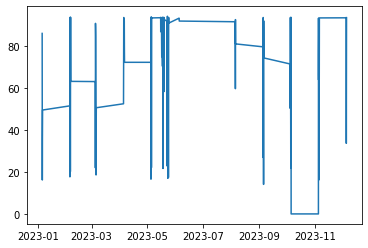

In [6]:
import matplotlib.pyplot as plt
plt.plot(interpolated_df['state_of_charge'])